### CASE STUDY: **FASHION CLASS CLASSIFICATION** USING **CONVOLUTIONAL NEURAL NETWORK (CNN)**

**Task**: Build and train a CNN classifier with 4 convolutional layers using Keras deep learning library to classify in images some class of objects.

**Data source**: https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/

#### STEP #1: PROBLEM STATEMENT

Fashion training set consists of **70,000 images** divided into **60,000 training** and **10,000 testing** samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
- 0 => T-shirt/top
- 1 => Trouser
- 2 => Pullover
- 3 => Dress
- 4 => Coat
- 5 => Sandal
- 6 => Shirt
- 7 => Sneaker
- 8 => Bag
- 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, where 0 represents black and 255 repreents white. 

![image](https://miro.medium.com/v2/resize:fit:1400/1*ncExuZtA3oqscNFaLPqitg.png)

#### STEP #2: IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
# Load training and testing datasets into dataframes
data_train = pd.read_csv('../datasets/fashion-mnist-dataset/fashion-mnist_train.csv',sep=',')
data_test = pd.read_csv('../datasets/fashion-mnist-dataset/fashion-mnist_test.csv', sep = ',')

#### STEP #3: VISUALIZATION OF THE DATASET  

> The dataset took an image and flattened it so each row represents an image.

In [4]:
data_train.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_train.shape

(60000, 785)

In [6]:
data_test.shape

(10000, 785)

In [7]:
# Create training and testing arrays/matrix
# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
# : is used to select all rows and 1: exclude the label column 
y = to_categorical(np.array(data_train.iloc[:, 0])) # label column

**Spliting the data**:

Split the original training data (60000 images) into 80% training (48000 images) and 20% validation (12000 images), while keeping the test data (10000 images) to evaluate the accuracy of the model on the data it has never seen.

In [8]:
# Split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

In [9]:
X_train.shape
 # drop the first column -> 784
 # 784 indicates 28x28 pixels

(48000, 784)

In [10]:
X_val.shape

(12000, 784)

In [11]:
y_train.shape # labels

(48000, 10)

In [12]:
# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [13]:
X_test.shape

(10000, 784)

**Processing Data**

Reshape the data into the shape the network expects and scale them to values in [0,1] intervals.

**Goal:** Transform the data into a float32 array of shape (60000, 28 * 28) with values between 0 and 1 (interval before: [0,255]).

In [17]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [19]:
# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# '/255' to scale the data  
# The pixel values are scaled from range of [0, 255] to a range of [0, 1]


In [20]:
# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [21]:
# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [25]:
X_train.shape

(48000, 28, 28, 1)

Text(0.5, 1.0, 'Image index: 11476, class 7')

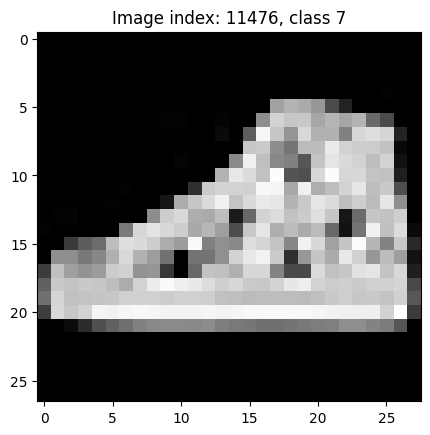

In [44]:
import matplotlib.pyplot as plt 
import random

# View an image from X_train
# Check a specific image from training data by index
i = random.randint(1,48000) # select any random index from 1 to 48000
plt.imshow(X_train[i,1:], cmap = 'gray') # 1 is the label column
class_name = data_train['label'].loc[i]
plt.title(f'Image index: {i}, class {class_name}')

# The 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [45]:
data_train['label'].loc[11476] # getting a label by index

7

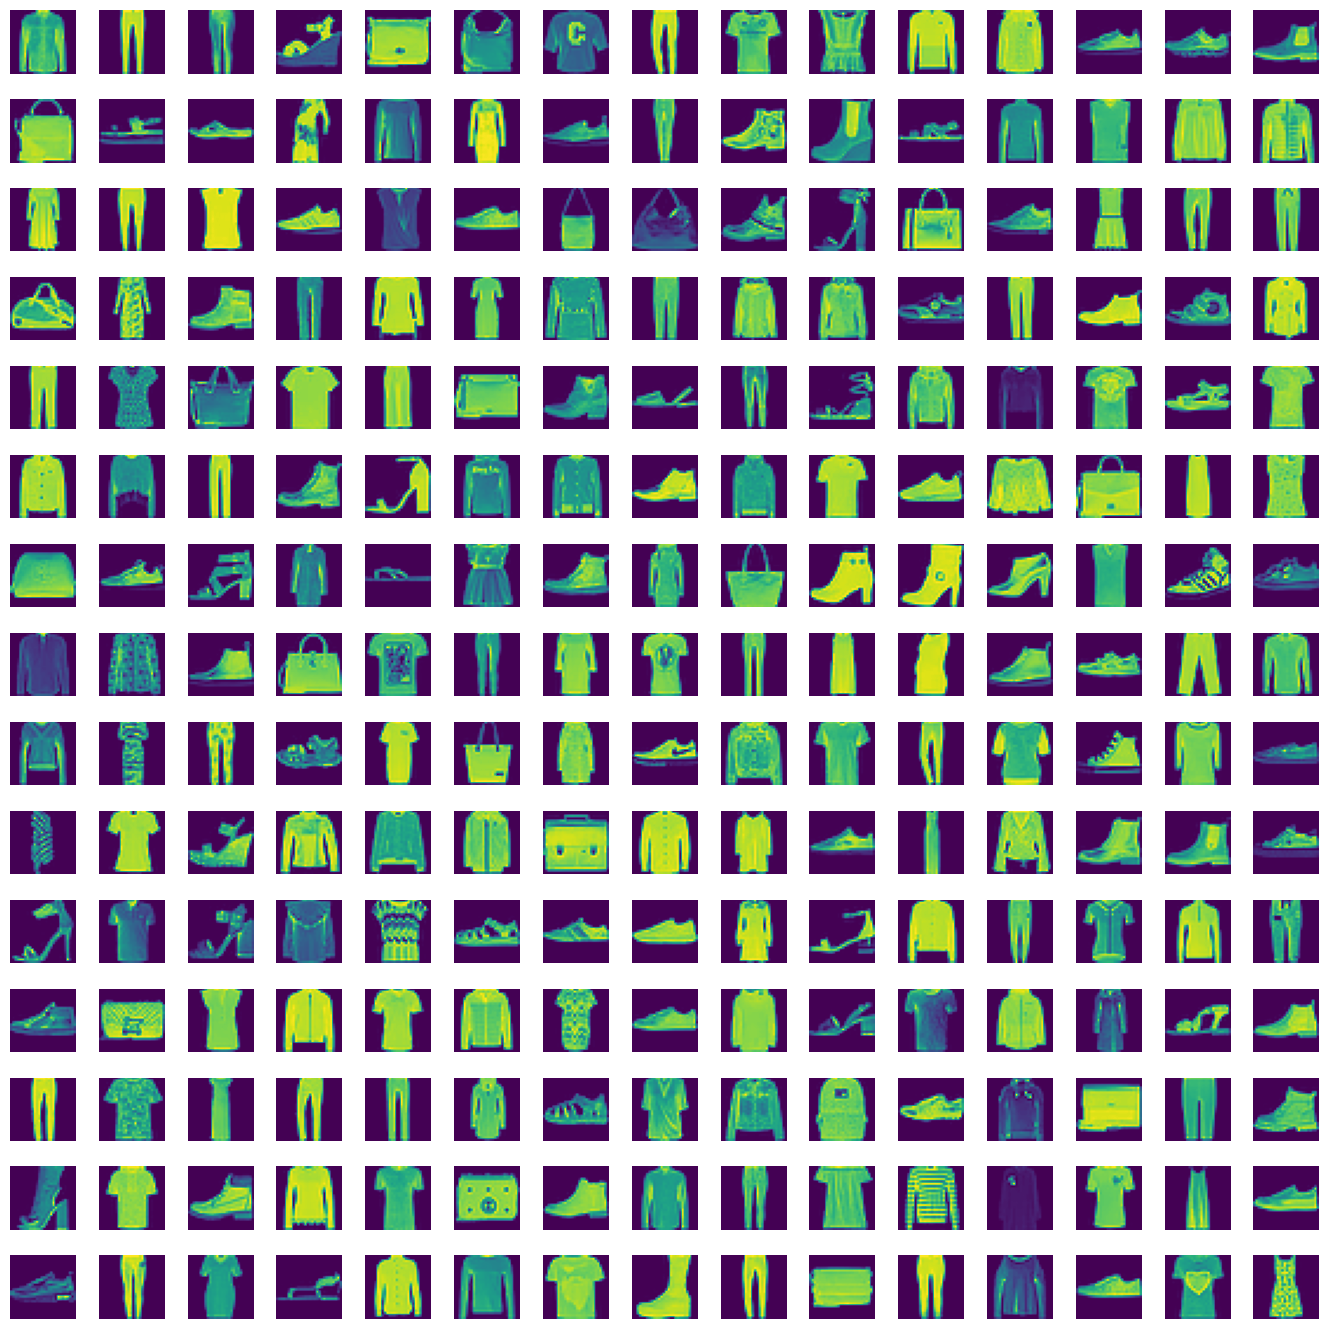

In [46]:
# View more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# subplot return the figure object and axes object
# Use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index,1:])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

#### STEP #4: BUILD AND TRAIN THE MODEL

**Artificial neural network** basics: 
- The neuron collects signals from input channels named dendtrites, processes information in its nucleus, and then generates an output in a long thin branch called the axon.
- Human learning occurs adaptivelly byt varying the bond strength between these neurons.

A neuron can be taken and represent it mathematically, by:

**n = P1W1 + P2W2 + P3W3 + b a = f(n)**

>  Once the value of the weight is changed, it's possible to adjust this network to learn a specific pattern. (in this case it's note the difference between bag and T-shirt class)

A **CNN** is a type of artificial neural network designed specifically for tasks involving visual data, such as image and video analysis. Feature detectors, often referred to as convolutional filters or kernels, are a crucial component of CNNs. The feature detectors in CNNs are the building blocks responsible for automatically extracting distinctive features from visual data. These features are learned during training, allowing the network to recognize patterns, shapes, and objects in images. The number of layers in a CNN significantly influences its capacity to learn and represent features from data. The maximum number of layers in a CNN is not strictly defined and depends on various factors, including hardware resources, data availability, the complexity of the task, and the architectural design of the network. A 4-layer CNN adds an extra convolutional layer to the 3-layer CNN. Deep networks can capture complex, high-level features.

**CNN with 4 Convolutional Layers**: this CNN takes as input tensors of shape (_image_height, image_width, image_channels). (28,28,1) is the format of the FashionMNIST images and because of this, the argument _input_shape=(28, 28, 1)_ will be used in the first layer.

Feature detectors in the CNN:
- The **Conv2D layers** are used for the convolution operation that extracts features from the input images by **sliding a convolution filter over the input to produce a feature map**. In this case the feature map has 3x3 size _(kernel_size=(3, 3))_;
- To normalize the input layers, the **BatchNormalization layers** is used to adjust and scale the activations. **Batch Normalization reduces the amount by what the hidden unit values shift around (covariance shift)**. Also, it allows each layer of a network to learn by itself a little bit more independently of other layers;
- The **MaxPooling2D layers** are used for the max-pooling operation that **reduces the dimensionality of each feature**, which helps shorten training time and reduce number of parameters. In this case the the pooling window has 2x2 size _(pool_size=(2, 2))_;
- The **Dropout layers** is a **regularization technique** and it's used to **reduce/avoid overfititng**. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. For example, the 1st dropout layer will randomnly disable 25% of the outputs _.add(Dropout(0.25))_. **Lower dropout rates (0.25, 0.3, or 0.4) can lead to faster convergence but may be more prone to overfitting if the model is too complex**. 
    - A higher dropout rate (0.5, 0.6, or 0.7) is used when you want to regularize the model more aggressively.  It can help the model generalize better to unseen data but might slow down convergence and require more epochs for training.
    - Increasing the dropout rate to 0.5 after the Flatten layer implies more aggressive regularization before entering the fully connected layers. This reduces the risk of overfitting in the densely connected layers, which typically have more parameters and can be prone to overfitting.
- To connect the classifiers it's necessary to **flatten the 3D outputs to 1D** and then add 2 Dense layers on top.
- The next step is to feed the last output tensor into a stack of **Dense layers**, otherwise known as **fully-connected layers**. These densely connected classifiers process vectors, which are 1D.
- It's used a final layer with 10 outputs once this is a 10-way classification (10 classes of fashion images) and a softmax activation. **Softmax activation enables me to calculate the output based on the probabilities**. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

> ReLU layers are applied at various stages in a CNN to introduce non-linearity, which is essential for enabling the network to learn and represent more complex features and relationships in the data. They play a crucial role in improving the expressiveness and training efficiency of CNNs.

![image info](../images/cnn-fashion.png)

In [48]:
# CNN with 4 Convolutional Layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [68]:
# Build the model
cnn_model = Sequential()

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(10, activation='softmax'))

> **This model has 4 Conv2D layers, 2 MaxPooling layers, 6 BatchNormalization layers, and 5 Dropout layers.**

- **Conv2D**:
1. Conv2D with 64 filters.
2. Conv2D with 64 filters.
3. Conv2D with 128 filters.
4. Conv2D with 256 filters.

- **Pooling Layers**:
    - MaxPooling2D layers follow some of the convolutional layers to reduce spatial dimensions.

- **Fully Connected (Dense) Layers**:
    - Dense layers with 512 and 128 units for feature extraction and representation.

- **Batch Normalization**:
    - BatchNormalization layers are included after each convolutional layer and dense layer for improved training stability.

- **Dropout**:
    - Dropout layers are included after some of the convolutional layers to prevent overfitting.


In [69]:
# Training parameters to evaluate the model
cnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

The **categorical_crossentropy** is used as the loss function, which is important for multiclass and single-label classification problem and **Adam** is used as gradient-based optimization. **Accuracy** is a common metric for classification tasks and measures the proportion of correctly predicted instances. It's a useful high-level metric for understanding the overall performance of your model.

- The **cross-entropy** loss calculates the **error rate** between the **predicted value and the original value**.**Categorical** is used because **there are 10 classes to predict from**. Problems with 2 classes: binary_crossentropy is used.
- The Adam (Adaptive Moment Estimation) optimizer is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight. That is how a neural network learns.

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*xf4fUzVynPgwAsjsl9va8Q.png)


In [70]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 26, 26, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_7 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                      

**The model summary provides a comprehensive view of the neural network's architecture, including each layer, its type, output shape, and the number of trainable parameters.**

- **2.573.514 parameters are available to be trained**;
- The **output of the Conv2D and MaxPooling2D layers are 3D tensors of shape** (none, height, width, channels) and **(none, units) for Dense layers**. None indicates that the batch size can vary, and the other dimensions depend on the layer's configuration. It allows flexibility in the number of samples that can be processed simultaneously, and it's determined when you actually feed data to the model for training or inference;
- The **params** indicates the number of parameters (also called weights) associated with each layer.
    -  For Conv2D layers, this includes the weights of the convolutional kernels. For Dense layers, this represents the weights and biases.
- The number of channels is controlled by the 1st argument (filters) passed to the Conv2D layer (64);
- The (4, 4, 256) output shape from the last convolutional layer is flattened into a vector of shape (4096,) by the Flatten layer. This flattened vector is then passed through the subsequent Dense layers for classification.

In [71]:
# Training the Model
history = cnn_model.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
188/188 [==============================] - 302s 2s/step - loss: 0.6777 - accuracy: 0.7634 - val_loss: 4.0123 - val_accuracy: 0.1049
Epoch 2/10
188/188 [==============================] - 309s 2s/step - loss: 0.3986 - accuracy: 0.8598 - val_loss: 2.7812 - val_accuracy: 0.3333
Epoch 3/10
188/188 [==============================] - 301s 2s/step - loss: 0.3303 - accuracy: 0.8831 - val_loss: 0.4483 - val_accuracy: 0.8425
Epoch 4/10
188/188 [==============================] - 312s 2s/step - loss: 0.2917 - accuracy: 0.8974 - val_loss: 0.2725 - val_accuracy: 0.9035
Epoch 5/10
188/188 [==============================] - 311s 2s/step - loss: 0.2699 - accuracy: 0.9048 - val_loss: 0.2394 - val_accuracy: 0.9096
Epoch 6/10
188/188 [==============================] - 301s 2s/step - loss: 0.2515 - accuracy: 0.9115 - val_loss: 0.2519 - val_accuracy: 0.9080
Epoch 7/10
188/188 [==============================] - 293s 2s/step - loss: 0.2360 - accuracy: 0.9158 - val_loss: 0.2404 - val_accuracy: 0.9146

In [74]:
# Save the model
#cnn_model.save('Machine Learning Practical/cnn_model_fmnist.h5')

In [75]:
# Load the model
# from keras.models import load_model
# loaded_model = load_model('cnn_model_fmnist.h5')

#### STEP #5: EVALUATING THE MODEL

In [76]:
# starting with 64
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3337685167789459
Test accuracy: 0.8949999809265137


In [78]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


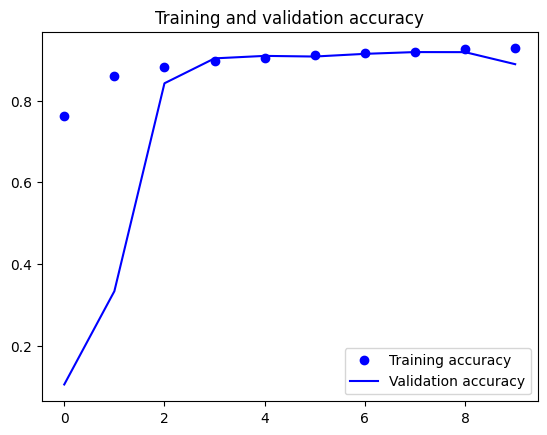

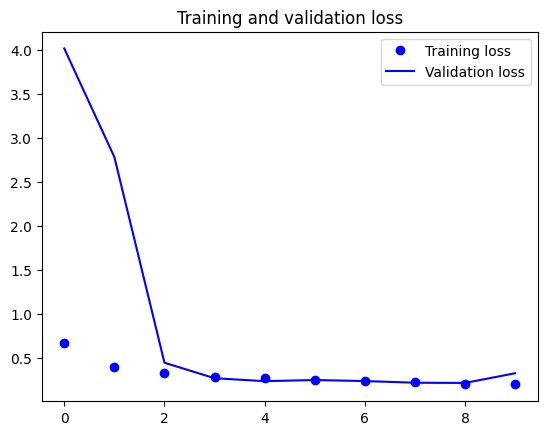

In [79]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [80]:
# Classification Report: performance of the classifier

# get the predictions for the test data
predicted_classes = cnn_model.predict(X_test)
classes_x=np.argmax(predicted_classes,axis=1)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(classes_x==y_true)[0]
incorrect = np.nonzero(classes_x!=y_true)[0]

313/313 [==============================] - 13s 42ms/step


In [82]:
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, classes_x, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.85      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.94      0.66      0.78      1000
     Class 3       0.91      0.95      0.93      1000
     Class 4       0.83      0.85      0.84      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.64      0.80      0.71      1000
     Class 7       0.93      0.97      0.95      1000
     Class 8       0.99      0.94      0.97      1000
     Class 9       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.90     10000
weighted avg       0.90      0.90      0.90     10000



**It's apparent that the classifier is underperforming for class 6 in terms of both precision and recall. For class 4, the classifier is slightly lacking precision; whereas for class 2 it is lacking recall and class for 0 and 4 is slightly lacking recall (0.85).**

#### **Visualizing the correct and incorrect predictions:**

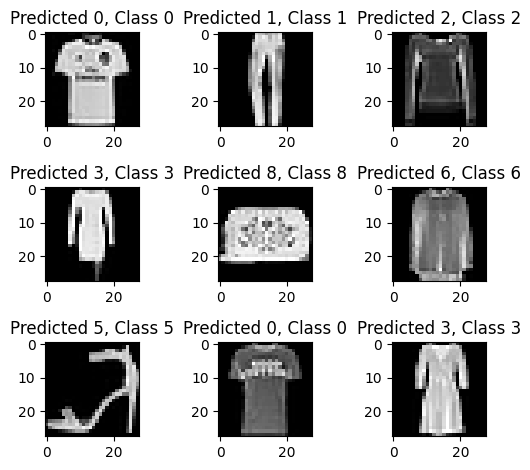

In [83]:
# Subset of correctly predicted classes:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[correct], y_true[correct]))
    plt.tight_layout()

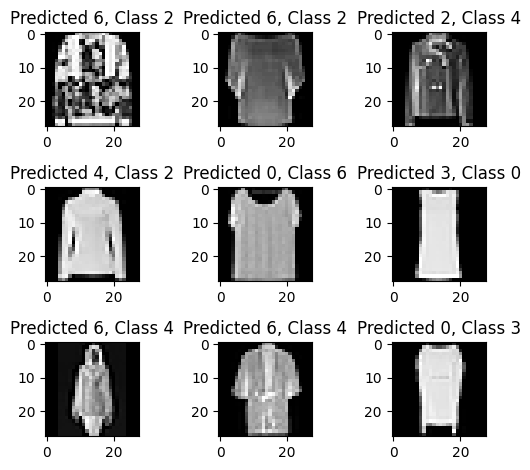

In [84]:
# Subset of incorrectly predicted classes:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[incorrect], y_true[incorrect]))
    plt.tight_layout()